#### Alternative to projected gradient descent

For a convex $f$, we consider the following

$$\min f(x), \, \text{s.t. } x\in C$$

We know previously that we can use `projected gradient descent`

$$x^{k+1}=P_C\left(x^k-\alpha_k \nabla f(x^k)\right)$$

What `Frank-Wolfe` algorithm does is to never have $x$ leave $C$

$$y^k = \arg\min_{y\in C} \nabla f(x^k)^Ty$$

and

$$\begin{align*}
x^{k+1}&=(1-\gamma_k)x^k+\gamma_ky^k \\
&=x^k+\gamma_k(y^k-x^k)
\end{align*}$$

Since $x^k$ and $y^k$ are both in $C$, therefore, their `convex combination` $x^{k+1}$ is also in $C$

$\gamma_k$ is often chosen as $\gamma_k=2/(k+1), k=1, 2,\cdots$

#### Where is $y^k$?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
import cvxpy as cp
import time

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

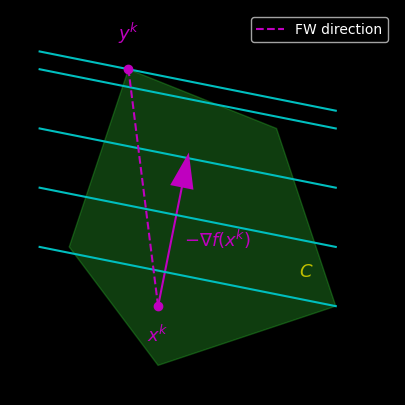

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.scatter(-1, -2, color='m', zorder=6)
plt.text(-1, -2.6, r'$x^k$', horizontalalignment='center', fontsize=13, color='m')

plt.plot([-1, -0.5], [-2, 0.5], 'm-')
ax.arrow(-0.5-0.1, 0.5-0.1/0.5*2.5, 0.001, 0.001/0.5*2.5,
         head_width=0.4, head_length=0.6, fc='m', ec='none', zorder=5)

plt.text(0, -1, r'$-\nabla f(x^k)$', horizontalalignment='center', fontsize=13, color='m')

polygon_points = np.array([[-1.5, 2], [-2.5, -1], [-1, -3], [2, -2], [1, 1]])
ax.fill(polygon_points[:, 0], polygon_points[:, 1], color='limegreen', alpha=0.3)

plt.plot([-3, 2], [1, 0], 'c-')
plt.plot([-3, 2], [0, -1], 'c-')
plt.plot([-3, 2], [-1, -2], 'c-')
plt.plot([-3, 2], [2, 1], 'c-')
plt.plot([-3, 2], [2.3, 1.3], 'c-')

plt.plot([-1, -1.5], [-2, 2], 'm--', label='FW direction')

plt.scatter(-1.5, 2, color='m', zorder=6)
plt.text(-1.5, 2.5, r'$y^k$', horizontalalignment='center', fontsize=13, color='m')

plt.text(1.5, -1.5, r'$C$', horizontalalignment='center', fontsize=13, color='y')

ax.set_xlim(-3.5, 3)
ax.set_ylim(-3.5, 3)
ax.set_aspect('equal')
ax.axis('off')
plt.legend(loc='upper right')
plt.show()

We can draw a set of parallel lines `perpendicular` to $-\nabla f(x^k)$ extending in the direction of $-\nabla f(x^k)$, then $y^k$ would be the point where the convex set $C$ touches the line that is `furthest` from $x^k$

The second step of convex combination would move $x^k$ along the direction $y^k-x^k$, which may not be the direction of $-\nabla f(x^k)$

Apparently this is useful when solving `linear minimization`

$$y^k =\arg\min_{y\in C} \nabla f(x^k)^Ty$$

is `simpler` than doing projection



#### Norm constraints

One type of convex set FW often deals with is arbitrary norm $C=\{x:\|x\|\leq t\}$

In this case, we have (recall subdifferential of arbitrary norm is expressed as $\partial \|x\|=\arg \max_{\|z\|_*\leq 1} z^Tx$)

$$\begin{align*}
y^k&\in \arg\min_{\|y\|\leq t} \nabla f(x^k)^Ty \\
&=(-t) \left(\arg\max_{\|y\|\leq 1} \nabla f(x^k)^Ty\right) \\
&=(-t) \left(\partial \|\nabla f(x^k)\|_* \right)
\end{align*}$$

Therefore, if we know how to compute the subgradient of dual norm, FW can be performed easily

#### Convergence

For a convex function $f$ that is $\beta$-smooth w.r.t. arbitrary norm, which by definition gives

$$\|\nabla f(x) - \nabla f(y)\|_* \leq \beta \|x-y\|$$

and we have the quadratic upper bound

$$\begin{align*}
f(x)-f(y)-\nabla f(y)^T(x-y)&\leq \frac{\beta}{2}\|x-y\|^2
\end{align*}$$

Let $R=\sup_{x, y \in C} \|x-y\|$

then, using FW algorithm to solve

$$\min f(x), \, \text{s.t. } x\in C$$

would produce the guarantee

$$f(x^k)-f(x^*)\leq \frac{2\beta R^2}{k+1}$$

##### Proof

Let $x=x^{k+1}$, $y=x^k$, and apply quadratic upper bound, we have

$$\begin{align*}
f(x^{k+1})-f(x^k)&\leq \nabla f(x^k)^T(x^{k+1}-x^k)+\frac{\beta}{2}\|x^{k+1}-x^k\|^2 \\
& x^{k+1}=(1-\gamma_k)x^k+\gamma_ky^k \\
&\leq \gamma_k \nabla f(x^k)^T(y^k-x^k)+\frac{\beta}{2} (\gamma_k)^2 R^2 \\
& \nabla f(x^k)^Ty^k\leq \nabla f(x^k)^Tx, \forall x\in C \\
&\leq \gamma_k \nabla f(x^k)^T(x^*-x^k)+\frac{\beta}{2} (\gamma_k)^2 R^2 \\
& \text{convexity of } f\\
&\leq \gamma_k \left(f(x^*)-f(x^k)\right)+\frac{\beta}{2} (\gamma_k)^2 R^2
\end{align*}$$

Rearrange

$$f(x^{k+1})-f(x^*) \leq (1-\gamma_k)\left(f(x^k)-f(x^*)\right)+\frac{\beta}{2} (\gamma_k)^2 R^2 $$

Define $\delta_k = f(x^k)-f(x^*)$

For base case where $k=1$, we have ($\gamma_1=\frac{2}{1+1}$)

$$\delta_2\leq (1-\frac{2}{1+1})\delta_1+\frac{\beta}{2}\left(\frac{2}{1+1}\right)^2R^2=\frac{\beta R^2}{2}<\frac{2\beta R^2}{2+1}$$

Then, we can use induction

$$\begin{align*}
\delta_{k+1}&\leq (1-\gamma_k)\delta_k + \frac{\beta}{2}\gamma_k^2R^2\\
& \gamma_k=\frac{2}{k+1} \\
&\leq \left(1-\frac{2}{k+1}\right)\frac{2\beta R^2}{k+1}+\frac{\beta}{2}\left(\frac{2}{k+1}\right)^2R^2 \\
&=\frac{k-1}{k+1}\frac{2\beta R^2}{k+1}+\frac{2\beta R^2}{(k+1)^2} \\
&=2\beta R^2 \frac{k}{(k+1)^2} \\
& (k+1)^2=k^2+2k+1\geq k(k+2), \, \forall k=1, 2, \cdots\\
&\leq \frac{2\beta R^2}{(k+1)+1}
\end{align*}$$

#### Constrained problem

For constrained problem

$$\min f(x), \,\text{s.t. } \|x\|\leq t$$

it is equivalent to

$$\min f(x) + \lambda \|x\|$$

as we let $t$ and $\lambda$ vary over $[0, \infty]$

##### LASSO example

For LASSO

$$\min_x \frac{1}{2}\|y-Ax\|_2^2+\lambda \|x\|_1$$

we have $f(x)=\frac{1}{2}\|y-Ax\|_2^2$

We can compute its gradient

$$\nabla f(x)=-A^T(y-Ax)$$

So, for the iterate, we have

$$y^k = \arg\min_{\|y\|_1\leq t} \nabla f(x^k)^Ty$$

This is like a resource allocation problem for element in $y$

The solution is that we should allocate all resource in $y$ in the negative direction of the largest element (in magnitude) in the gradient

$$y^k=(-t)\cdot\text{sgn}\left(\nabla f(x^k)_{\max}\right)e_{\max}$$

Finally, we do

$$\begin{align*}
x^{k+1}&=(1-\gamma_k)x^k+\gamma_ky^k \\
\end{align*}$$

where $\gamma_k=\frac{2}{k+1}$

In [ ]:
def cholesky_factorization(A):
    m = A.shape[0]
    l_mat = A.copy().astype(float)

    for k in range(m):
        if l_mat[k, k] <= 0:
            raise ValueError('Matrix is not positive definite')

        # Follow the first step, iteratively apply to a smaller and smaller K
        l_mat[k+1:, k+1:] -= np.outer(l_mat[k+1:, k], l_mat[k+1:, k]) / l_mat[k, k]
        l_mat[k:, k] /= np.sqrt(l_mat[k, k])

    return np.tril(l_mat)

def forward_substitution(L, b):
    m, n = L.shape
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - np.dot(L[i, :i], x[:i])) / L[i, i]
    return x

def back_substitution(R, b):
    m, n = R.shape
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(R[i, i + 1:], x[i + 1:])) / R[i, i]
    return x

In [ ]:
def subgrad_l1_ls(A, b, x1, lamb=0.5, a=1e-2, tol=1e-3, n_iter=3000):
    # l1-regularized least squares

    h = [np.inf]
    h_best = [np.inf]
    x = x1.copy()

    for k in range(1, n_iter+1):
        subgrad = A.T @ (A @ x - b) + lamb * np.sign(x)
        h_val = 0.5 * np.linalg.norm(A @ x - b)**2 + lamb * np.linalg.norm(x, ord=1)

        # Step size
        alpha = a / np.sqrt(k)

        h.append(h_val)
        h_best.append(min(h_val, h_best[-1]))

        # Subgradient step
        x = x - alpha * subgrad

    hist = {'h': h, 'h_best': h_best}

    return x, hist

In [ ]:
def prox_l1(x, lamb, t):
    # proximal operator on l1 norm
    return np.sign(x) * np.maximum(np.abs(x) - t * lamb, 0)

def h(x, A, b, lamb):
    return 0.5 * np.linalg.norm(A @ x - b)**2 + lamb * np.linalg.norm(x, ord=1)

def f(x, A, b):
    return 0.5 * np.linalg.norm(A @ x - b)**2

def ista_l1_ls(A, b, x1, lamb=0.5, tol=1e-8, n_iter=3000, min=min):
    h_hist = [np.inf]
    x = x1.copy()
    beta = 0.5
    t = 1

    for k in range(1, n_iter+1):
        z = prox_l1(x - t * A.T @ (A @ x - b), lamb, t)
        # backtracking line search
        while f(z, A, b) > f(x, A, b) + A.T @ (A @ x - b) @ (z - x) + 0.5 * np.linalg.norm(z - x)**2 / t:
            t *= beta
            z = prox_l1(x - t * A.T @ (A @ x - b), lamb, t)
        x = z
        h_hist.append(h(x, A, b, lamb))
        if abs(h_hist[-1] - min) < tol:
            break

    hist = {'h': h_hist}

    return x, hist

def fista_l1_ls(A, b, x1, lamb=0.5, tol=1e-8, n_iter=3000,min=min):
    h_hist = [np.inf]
    x = x1.copy()
    beta = 0.5
    t = 1
    x_prev = x1.copy()
    for k in range(1, n_iter+1):
        v = x + (k-1) / (k+2) * (x - x_prev)
        z = prox_l1(v - t * A.T @ (A @ v - b), lamb, t)
        # backtracking line search
        while f(z, A, b) > f(v, A, b) + A.T @ (A @ v - b) @ (z - v) + 0.5 * np.linalg.norm(z - v)**2 / t:
            t *= beta
            z = prox_l1(v - t * A.T @ (A @ v - b), lamb, t)
        x_prev = x
        x = z
        h_hist.append(h(x, A, b, lamb))
        if abs(h_hist[-1] - min) < tol:
            break

    hist = {'h': h_hist}

    return x, hist

def admm_l1_ls(A, b, x1, lamb=0.5, tol=1e-8, n_iter=3000, min=min):
    rho = 1/lamb
    h_hist = [np.inf]
    x = x1.copy()
    z = x1.copy()
    w = np.zeros_like(x)
    try:
        # L = np.linalg.cholesky(A.T @ A + rho * np.eye(A.shape[1]))
        L = cholesky_factorization(A.T @ A + rho * np.eye(A.shape[1]))
    except ValueError:
        raise ValueError('Matrix is not positive definite')

    for k in range(1, n_iter+1):
        y = forward_substitution(L, A.T @ b + rho * (z - w))
        x = back_substitution(L.T, y)
        z = prox_l1(x + w, lamb, 1/rho)
        w = w + x - z
        h_hist.append(h(x, A, b, lamb))
        if abs(h_hist[-1] - min) < tol:
            break

    hist = {'h': h_hist}

    return x, hist

def fw_l1_ls(A, b, x0, t, lamb, tol=1e-6, n_iter=500, min=min):
    x = x0.copy()
    h_hist = []

    for k in range(1, n_iter + 1):
        grad = A.T @ (A @ x - b)

        max_idx = np.argmax(np.abs(grad))
        y = np.zeros_like(x)
        y[max_idx] = -t * np.sign(grad[max_idx])

        gamma_k = 2 / (k + 1)

        x = (1 - gamma_k) * x + gamma_k * y

        h_hist.append(h(x, A, b, lamb))

        if t > 1 and np.abs(h_hist[-1] - min) < tol:
            break

    hist = {'h': h_hist}
    return x, hist

In [ ]:
np.random.seed(42)
n = 1000
m = 500
lamb = 0.5
A = np.random.randn(m, n)
b = np.random.randn(m)

x_var = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.norm(A @ x_var - b)**2 + lamb * cp.norm(x_var, 1))
problem = cp.Problem(objective)
problem.solve()

h_min = problem.value

Optimal value (CVXPY) 10.2022

Optimal h (Subgradient): 11.6873
time: 10.5957s

Optimal h (ISTA): 10.2025
time: 33.0080s

Optimal h (FISTA): 10.2022
Optimal t from FISTA: 19.8584
time: 11.5581s

Optimal h (ADMM): 10.2022
time: 54.0817s

Optimal h (Frank-Wolfe): 10.8374
time: 7.5576s


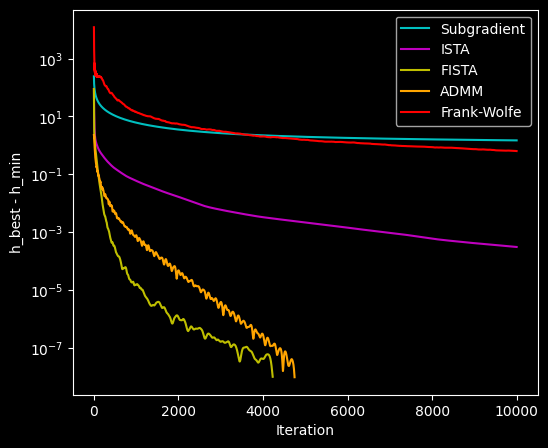

In [ ]:
x1 = np.zeros(n)
Rtrue = np.linalg.norm(x1 - x_var.value)
print(f"Optimal value (CVXPY) {h_min:.4f}")
tol = 1e-8
n_iter = 10000

fig, ax = plt.subplots(figsize=(6, 5))

start_time = time.time()
x_subgrad, hist_subgrad = subgrad_l1_ls(A, b, x1, lamb=lamb, a=1e-4, tol=tol, n_iter=n_iter)
print(f"\nOptimal h (Subgradient): {hist_subgrad['h_best'][-1]:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

start_time = time.time()
x_ista, hist_ista = ista_l1_ls(A, b, x1, lamb=lamb, tol=tol, n_iter=n_iter, min=h_min)
print(f"\nOptimal h (ISTA): {hist_ista['h'][-1]:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

start_time = time.time()
x_fista, hist_fista = fista_l1_ls(A, b, x1, lamb=lamb, tol=tol, n_iter=n_iter, min=h_min)
print(f"\nOptimal h (FISTA): {hist_fista['h'][-1]:.4f}")
t_opt = np.linalg.norm(x_fista, 1) # Use FISTA result to estimate bound of L1 norm
print(f"Optimal t from FISTA: {t_opt:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

start_time = time.time()
x_admm, hist_admm = admm_l1_ls(A, b, x1, lamb=lamb, tol=tol, n_iter=n_iter, min=h_min)
print(f"\nOptimal h (ADMM): {hist_admm['h'][-1]:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

start_time = time.time()
x_fw, hist_fw = fw_l1_ls(A, b, x1, t=t_opt, lamb=lamb, tol=tol, n_iter=n_iter, min=h_min)
print(f"\nOptimal h (Frank-Wolfe): {hist_fw['h'][-1]:.4f}")
print(f"time: {time.time() - start_time:.4f}s")

ax.semilogy(np.arange(1, len(hist_subgrad['h_best'])), np.array(hist_subgrad['h_best'][1:]) - h_min, 'c-', label="Subgradient")
ax.semilogy(np.arange(1, len(hist_ista['h'])), np.array(hist_ista['h'][1:]) - h_min, 'm-', label="ISTA")
ax.semilogy(np.arange(1, len(hist_fista['h'])), np.array(hist_fista['h'][1:]) - h_min, 'y-', label="FISTA")
ax.semilogy(np.arange(1, len(hist_admm['h'])), np.array(hist_admm['h'][1:]) - h_min, '-', label="ADMM", c='orange')
ax.semilogy(np.arange(1, len(hist_fw['h'])), np.array(hist_fw['h'][1:]) - h_min, 'r-', label="Frank-Wolfe")
ax.set_xlabel('Iteration')
ax.set_ylabel('h_best - h_min')
ax.legend()

plt.show()

Since FW updates only one coordinate at a time, while ISTA/FISTA update all coordinates at once, FW is inefficient unless the solution is very sparse and requires only a few nonzero coordinates